## Heart Disease Prediction Model

In [113]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
                                          
from sklearn import model_selection                     
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression     

from sklearn.model_selection import KFold                  
from sklearn.model_selection import cross_val_score    

from sklearn import metrics                                             
from sklearn.metrics import confusion_matrix          
from sklearn import preprocessing  

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder


df=pd.read_csv('heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [117]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Have Heart Disease:  508
Not Have Heart Disease :  410


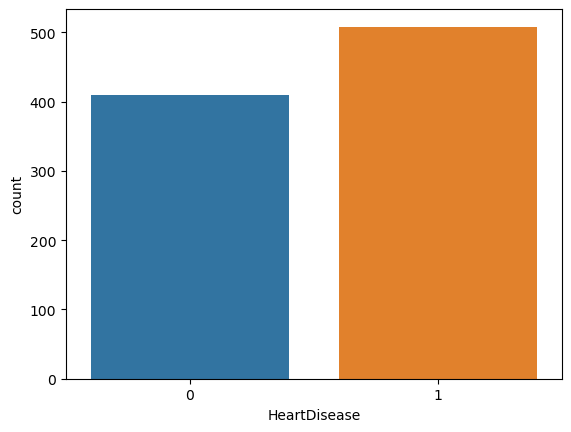

In [119]:
y=df['HeartDisease']
plot_sb = sns.countplot(df,x=y, label='Total')
Rain, NotRain =y.value_counts()
print('Have Heart Disease: ',Rain)
print('Not Have Heart Disease : ',NotRain)

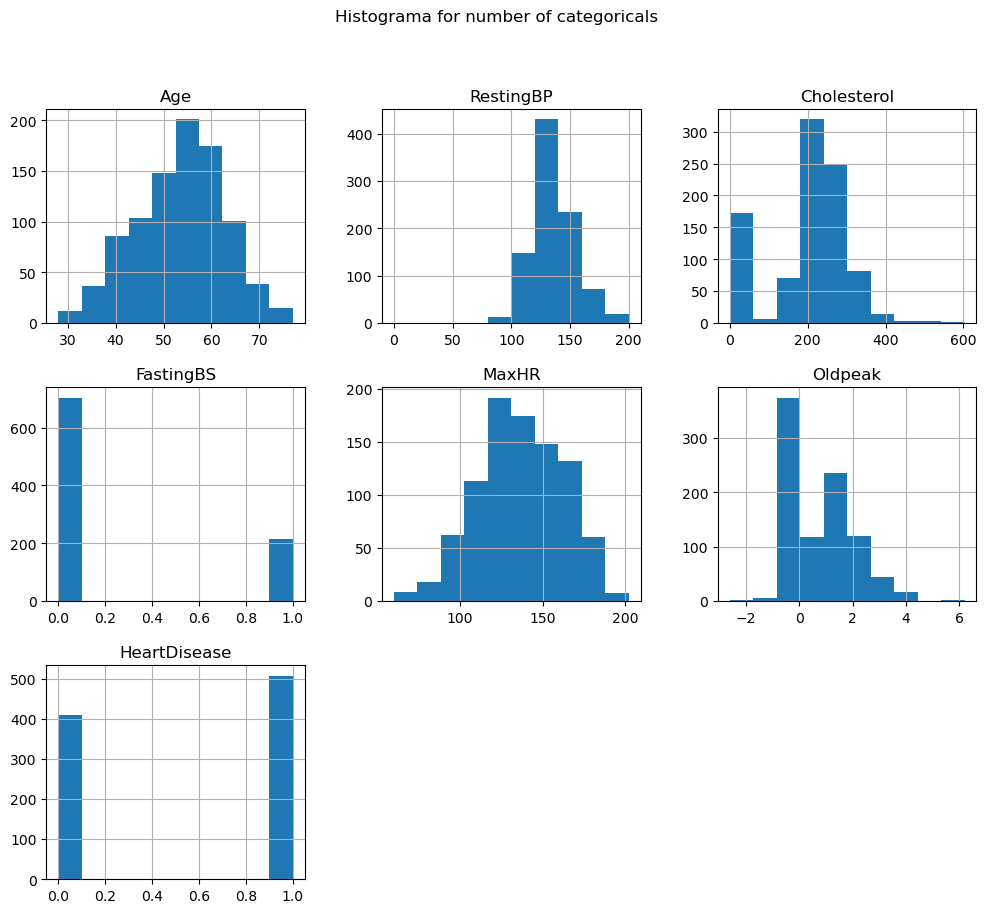

In [120]:
df.hist(figsize=(12, 10))
plt.suptitle('Histograma for number of categoricals')
plt.show()

## Data Preprocessing

In [123]:
sex=LabelEncoder()
cpt=LabelEncoder()
recg=LabelEncoder()
ea=LabelEncoder()
st=LabelEncoder()
df['Sex']=sex.fit_transform(df['Sex'])
df['ChestPainType']=cpt.fit_transform(df['ChestPainType'])
df['RestingECG']=recg.fit_transform(df['RestingECG'])
df['ExerciseAngina']=ea.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=st.fit_transform(df['ST_Slope'])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [124]:
thresh_hold=0.2
select_feat=corr_matrix.index[abs(corr_matrix['HeartDisease'])>=thresh_hold].to_list()
select_feat.remove('HeartDisease')
print(select_feat)

['Age', 'Sex', 'ChestPainType', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [125]:
selected_features=df[select_feat]
selected_features.head()

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,289,0,172,0,0.0,2
1,49,0,2,180,0,156,0,1.0,1
2,37,1,1,283,0,98,0,0.0,2
3,48,0,0,214,0,108,1,1.5,1
4,54,1,2,195,0,122,0,0.0,2


In [126]:
scaler=StandardScaler()
selected_features=scaler.fit_transform(selected_features)
selected_features

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

## Model Training

In [128]:
target=df['HeartDisease']
target

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [130]:
X_train,X_test,Y_train,Y_test=train_test_split(selected_features,target,test_size=0.2, random_state=1)
print('X training data size: {}'.format(X_train.shape))
print('y training data size: {}'.format(Y_train.shape))
print('X testing data size:  {}'.format(X_test.shape))
print('y testing data size:  {}'.format(Y_test.shape))
print("{0:0.2f}% of data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% of data is in test set".format((len(X_test)/len(df.index)) * 100))

X training data size: (734, 9)
y training data size: (734,)
X testing data size:  (184, 9)
y testing data size:  (184,)
79.96% of data is in training set
20.04% of data is in test set


## Support Vector Machine (SVM)

In [138]:
from sklearn.svm import SVC
SVM_model=SVC()
SVM_model.fit(X_train,Y_train)
svm_pred=SVM_model.predict(X_test)
accuracy=accuracy_score(Y_test,svm_pred)
print("SVM Accuracy=",int(accuracy*100),'%') 
print("SVM ROC-AUC:",int(roc_auc_score(Y_test, svm_pred) * 100),'%')
print(classification_report(Y_test, svm_pred))

SVM Accuracy= 91 %
SVM ROC-AUC: 90 %
              precision    recall  f1-score   support

           0       0.93      0.86      0.90        74
           1       0.91      0.95      0.93       110

    accuracy                           0.92       184
   macro avg       0.92      0.91      0.91       184
weighted avg       0.92      0.92      0.92       184



##  Decision Tree

In [141]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:",int(accuracy_score(Y_test, dt_pred)*100),'%')
print("Decision Tree ROC-AUC:",int(roc_auc_score(Y_test, dt_pred)*100),'%')
print(classification_report(Y_test, dt_pred))

Decision Tree Accuracy: 76 %
Decision Tree ROC-AUC: 76 %
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        74
           1       0.84      0.75      0.79       110

    accuracy                           0.77       184
   macro avg       0.76      0.77      0.76       184
weighted avg       0.78      0.77      0.77       184



## Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
rf_cm = confusion_matrix(Y_test, rf_pred)
print("Random Forest Accuracy:", int(accuracy_score(Y_test, rf_pred)*100),'%')
print("Random Forest ROC-AUC:",int(roc_auc_score(Y_test, rf_pred)*100),'%')
print(classification_report(Y_test, rf_pred))

Random Forest Accuracy: 86 %
Random Forest ROC-AUC: 85 %
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        74
           1       0.88      0.91      0.89       110

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184



## Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, Y_train)
log_pred = log_model.predict(X_test)
log_cm = confusion_matrix(Y_test, log_pred)
print("Logistic Regression Accuracy:", int(accuracy_score(Y_test, log_pred)*100),'%')
print("Logistic Regression ROC-AUC:", int(roc_auc_score(Y_test, log_pred)*100),'%')
print("Logistic Regression Confusion Matrix:")
print(log_cm)
print("Logistic Regression Classification Report:")
print(classification_report(Y_test, log_pred))

Logistic Regression Accuracy: 91 %
Logistic Regression ROC-AUC: 90 %
Logistic Regression Confusion Matrix:
[[ 65   9]
 [  7 103]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        74
           1       0.92      0.94      0.93       110

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



## K-Nearest Neighbors (KNN)

In [150]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)
knn_pred = knn_model.predict(X_test)
knn_cm = confusion_matrix(Y_test, knn_pred)
print("K-Nearest Neighbour Accuracy:", int(accuracy_score(Y_test, knn_pred)*100),'%')
print("K-Nearest Neighbour ROC-AUC:",int( roc_auc_score(Y_test, knn_pred)*100),'%')
print("K-Nearest Neighbour Confusion Matrix:")
print(knn_cm)
print("K-Nearest Neighbour Classification Report:")
print(classification_report(Y_test, knn_pred))

K-Nearest Neighbour Accuracy: 89 %
K-Nearest Neighbour ROC-AUC: 89 %
K-Nearest Neighbour Confusion Matrix:
[[ 64  10]
 [  9 101]]
K-Nearest Neighbour Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        74
           1       0.91      0.92      0.91       110

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



## Conclusion
Logistic Regression and SVM emerged as the top performers, both achieving an accuracy of 91% and a ROC-AUC of 90%. These metrics suggest that both models are highly accurate and effective at distinguishing between patients with and without heart disease.